The purpose of this file is to preprocess some toy data to protoype the PyTorch model

In [3]:
from pathlib import Path 
import numpy as np
import sys
sys.path.insert(1, str(Path.cwd().parent.parent / 'Shared_Functionality' / 'Data_Viz'))
from data_viz_functions import *

# Load the files

unprocessed_path = Path.cwd() / 'toy training data' / '1. Andy McKee - Ouray'
processed_path = Path.cwd() / 'toy training data' / 'preprocessed'

notes = np.load(unprocessed_path / 'notes_simplified.npy')
spec = np.load(unprocessed_path / 'spectrogram.npy')

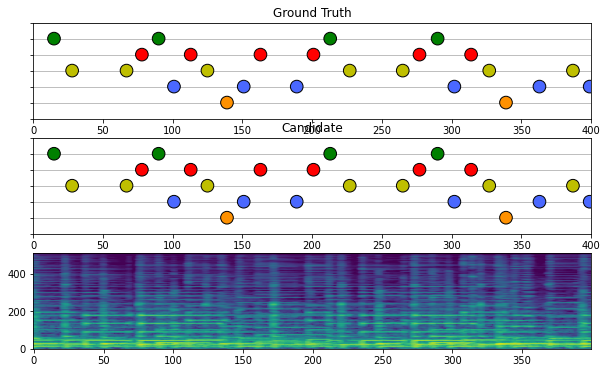

In [4]:
notes_slice = slice_notes(notes, start=10, end=14)
spec_slice = spec[:, 1000:1400]

plot_chart(notes_slice, notes_slice, audio=spec_slice)

(50, 432)


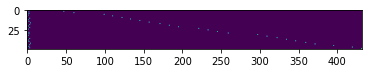

In [13]:
import matplotlib.pyplot as plt

def notes_to_output_space(notes):
    '''
    Takes a notes array as input, and outputs a matrix of numpy arrays in the output format specified
    by sequence to sequence piano transcription

    ~~~~ ARGUMENTS ~~~~
    - notes : numpy array

    ~~~~ RETURNS ~~~~
    - formatted : numpy array
        - Y axis is sequential note events
        - X axis is one hot encoded arrays
    '''
    # Get number of notes in array
    num_notes = np.count_nonzero(notes)

    # Convert "218" i.e. open notes to
    notes = np.where(notes == 218, 32, notes)

    # Construct a numpy array of the proper dimensionality
    # 32 positions for the one hot encoded notes, 400 for the absolute time
    formatted = np.zeros(shape=(num_notes*2, 32 + 400))

    # Loop through notes array and populate formatted

    i = 0
    for time_pos, x in enumerate(notes):
        if x != 0:
            formatted[2*i, int(x)-1] = 1  # subtract 1 for python indexing
            formatted[2*i+1, time_pos+32] = 1  # Add 32 to put at end of arrays
            i += 1

    print(formatted.shape)

    return formatted

formatted = notes_to_output_space(notes_slice)
plt.imshow(formatted)

In [21]:
# Squash spectrogram between 0 and 1
spec_slice = spec[:, 1000:1400]
spec_slice = (spec_slice+80) / 80

0.945767879486084


In [22]:
# Save formatted and spec slice
np.save('formatted_notes.npy', formatted)
np.save('spectrogram_slice.npy', spec_slice)